# Séries Temporais

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from datetime import datetime

# registro de converters para uso do matplotlit:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Carregar base de dados:

In [25]:
base0 = pd.read_csv('AirPassengers.csv')
print("Linhas e colunas:", base0.shape)
print("\nTipos de dimensões:", base0.dtypes)
base0.head()

Linhas e colunas: (144, 2)

Tipos de dimensões: Month          object
#Passengers     int64
dtype: object


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Converter a coluna 'Month' de texto para data:

Função lambda é uma expressão que define uma função pequena e anônima: `lambda argumentos: expressão`

In [26]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

base1 = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
#base1 = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_format = dateparse)

print("Índice:", base1.index)
base1.head()


Índice: DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


C:\Users\Utente\AppData\Local\Temp\ipykernel_18436\4106998699.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base1 = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Criar a Série Temporal:

In [27]:
serie_temporal = base1['#Passengers']
serie_temporal

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

Visualização da Série Temporal:

In [28]:
print("# Visualização de registro específico:", serie_temporal.iloc[1])
print("\n# Visualização de data específica:", serie_temporal[datetime(1949,2,1)])
print("\n# Visualização por ano e mês:", serie_temporal["1949-02"])
print("\n# Visualização por ano apenas:", serie_temporal["1949"])
print("\n# Visualização de intervalos:", serie_temporal["1949-01-01":"1949-12-01"])
print("\n# Visualização de intervalos sem preencher a data de início:", serie_temporal[:'1949-12-31'])



# Visualização de registro específico: 118

# Visualização de data específica: 118

# Visualização por ano e mês: Month
1949-02-01    118
Name: #Passengers, dtype: int64

# Visualização por ano apenas: Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Visualização de intervalos: Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Visualização de intervalos sem preencher a data de início: Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01 

Medidas de Centralidade na Série Temporal:

In [29]:
# Valores máximos 
print('Max:', serie_temporal.index.max())

# mínimos
print('Min:', serie_temporal.index.min())

# mínimos
print('Mean:', serie_temporal.index.mean())

Max: 1960-12-01 00:00:00
Min: 1949-01-01 00:00:00
Mean: 1954-12-16 05:00:00


Plotagem da Série Temporal:

Completa:

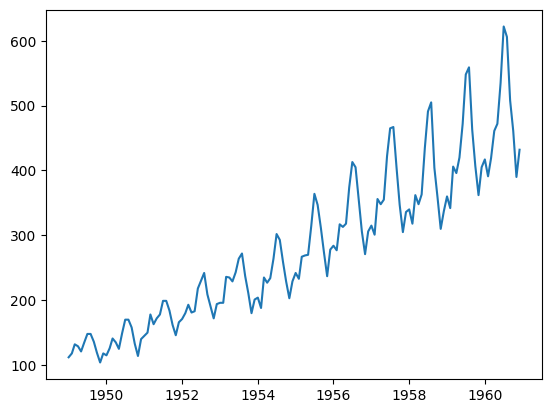

In [30]:
plt.plot(serie_temporal)

Acumulada por ano

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: #Passengers, dtype: int64


C:\Users\Utente\AppData\Local\Temp\ipykernel_18436\2703766303.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  serie_temporal_ano = serie_temporal.resample('A').sum()


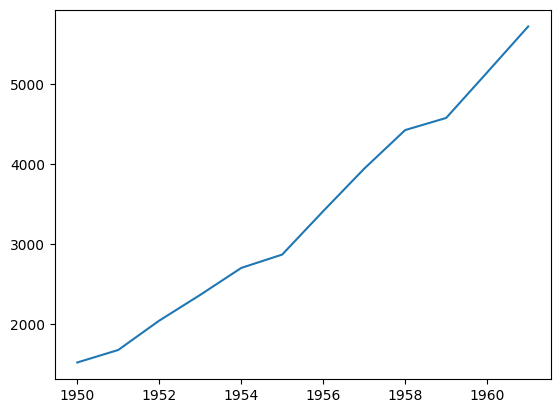

In [31]:
serie_temporal_ano = serie_temporal.resample('A').sum()
print(serie_temporal_ano)

plt.plot(serie_temporal_ano)

Acumulada por mês

Month
1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64


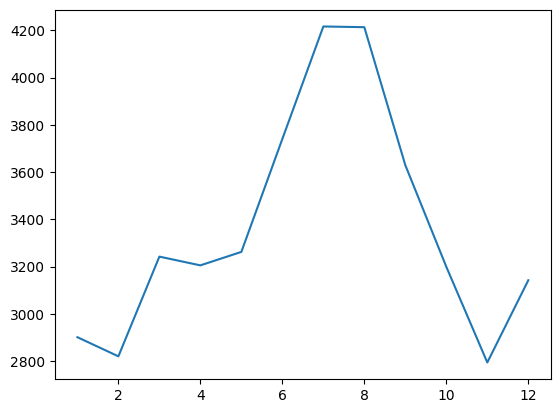

In [32]:
serie_temporal_mes = serie_temporal.groupby([lambda x: x.month]).sum()
print(serie_temporal_mes)

plt.plot(serie_temporal_mes)

Visualação entre um período de datas especificadas

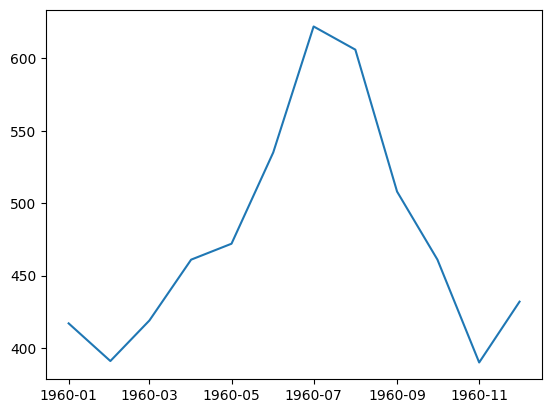

In [33]:
serie_temporal_data = serie_temporal['1960-01-01':'1960-12-01']
plt.plot(serie_temporal_data)

# Decomposição

Bibliotecas

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

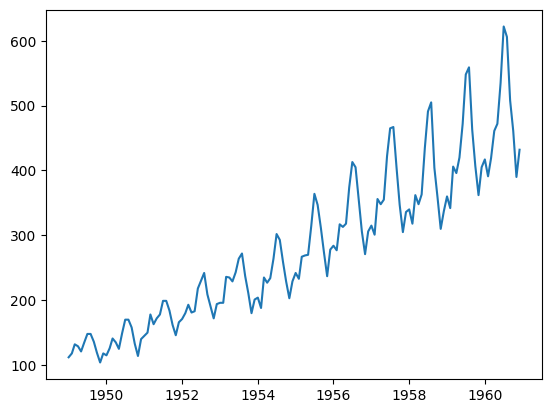

In [35]:
ts = base1['#Passengers']
plt.plot(ts)

Criar uma variável para cada formato


In [36]:
#Armazenar a função decomposição sazonal em uma variável
decomposicao = seasonal_decompose(ts)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64


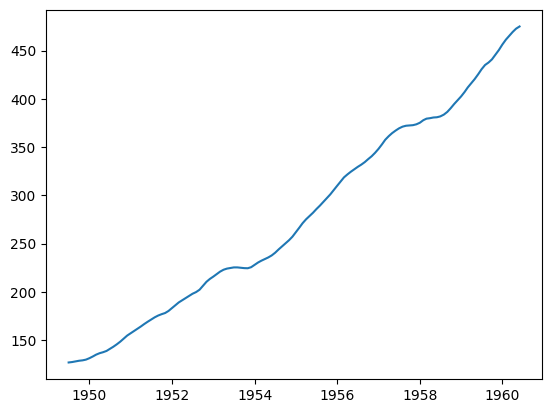

In [37]:
# Tendência
tendencia = decomposicao.trend
print(tendencia)
plt.plot(tendencia)

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64


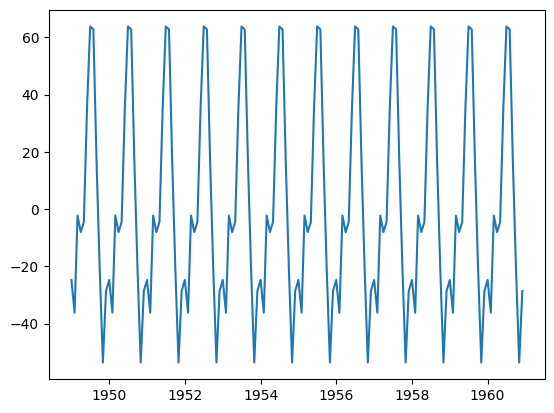

In [38]:
# Sazonalidade
sazonal = decomposicao.seasonal
print(sazonal)
plt.plot(sazonal)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


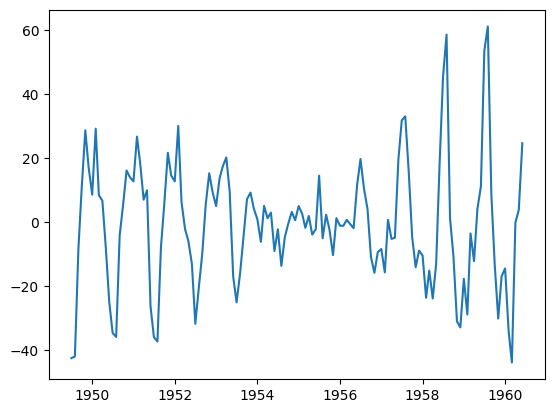

In [39]:
# Erro aleatório
aleatorio = decomposicao.resid
print(aleatorio)
plt.plot(aleatorio)

Tudo de uma só vez

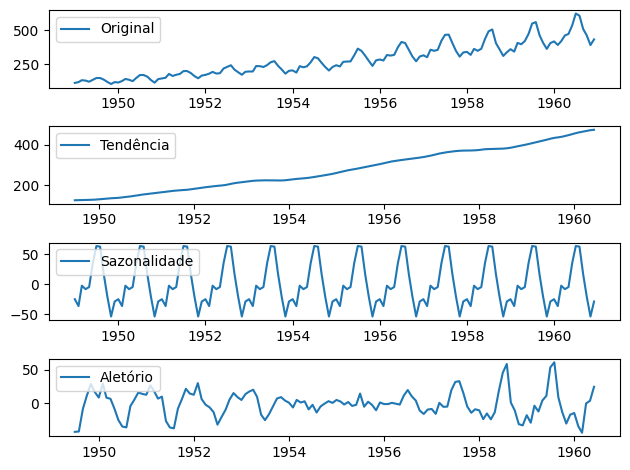

In [40]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'upper left') 
#'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right', 'center', 'best' 

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'upper left')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'upper left')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório')
plt.legend(loc = 'upper left')
plt.tight_layout()

# Previsões ARIMA

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


Puxar dataser de uma URL


In [75]:
# Carregar o dataset com frequência especificada
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, index_col='Month', parse_dates=True)
df.index.freq = 'MS'  # Especificar a frequência mensal

# Visualizar os dados
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


Plotar a série temporal

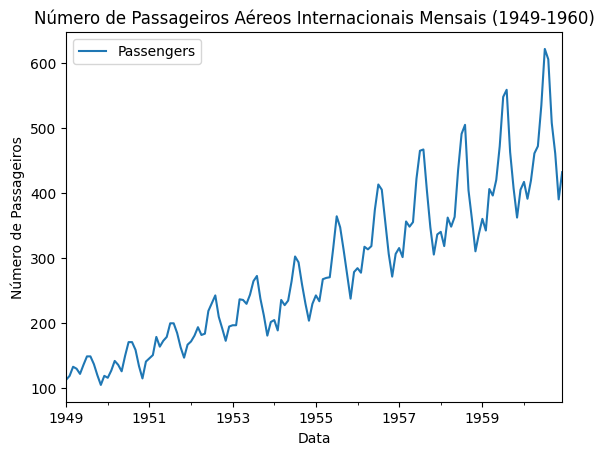

In [76]:
df.plot()
plt.title('Número de Passageiros Aéreos Internacionais Mensais (1949-1960)')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.show()

Teste de Estacionaridade

In [77]:
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: 0.8153688792060497
p-value: 0.991880243437641
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


Decomposição da Série Temporal

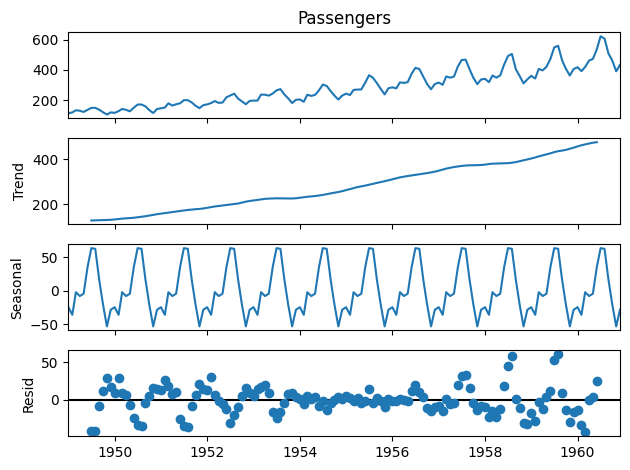

In [78]:
decomposition = seasonal_decompose(df['Passengers'], model='additive')
decomposition.plot()
plt.show()


Ajuste do Modelo ARIMA

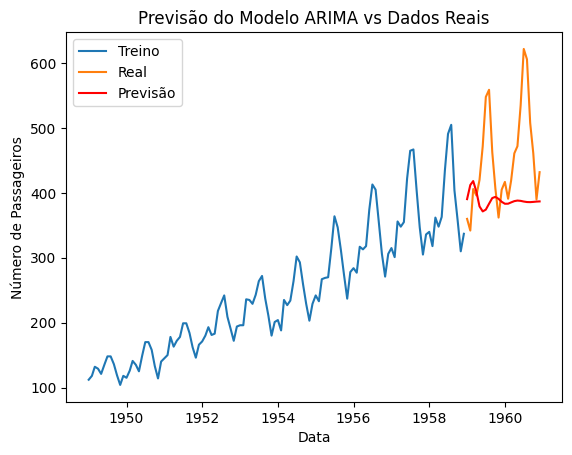

Erro Quadrático Médio: 10334.60


In [82]:
# Dividir os dados em treino e teste
train, test = df['Passengers'][:120], df['Passengers'][120:]

# Ajustar o modelo ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Plotar os resultados
plt.plot(train.index, train.values, label='Treino')
plt.plot(test.index, test.values, label='Real')
plt.plot(forecast_index, forecast, color='red', label='Previsão')
plt.title('Previsão do Modelo ARIMA vs Dados Reais')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()

# Calcular o erro
error = mean_squared_error(test.values, forecast)
print(f'Erro Quadrático Médio: {error:.2f}')


C:\Users\Utente\AppData\Local\Temp\ipykernel_18436\3110375497.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='1961-01', periods=12, freq='M')


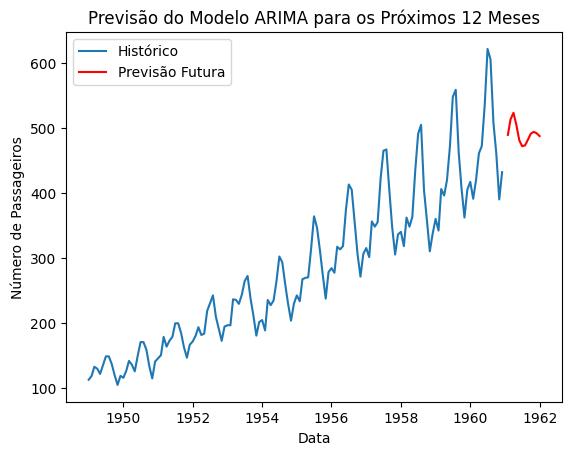

In [ ]:
# Ajustar o modelo aos dados completos
model = ARIMA(df['Passengers'], order=(5, 1, 0))
model_fit = model.fit()

# Fazer previsões futuras (12 meses à frente)
future_forecast = model_fit.forecast(steps=12)

# Criar um DataFrame para as previsões futuras
future_dates = pd.date_range(start='1961-01', periods=12, freq='M')
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})

# Plotar os resultados
plt.plot(df['Passengers'], label='Histórico')
plt.plot(future_dates, future_forecast, color='red', label='Previsão Futura')
plt.title('Previsão do Modelo ARIMA para os Próximos 12 Meses')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()


C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Utente\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Utente\AppData\Local\Temp\ipykernel_18436\2784377864.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='1961-01', periods=24, fre

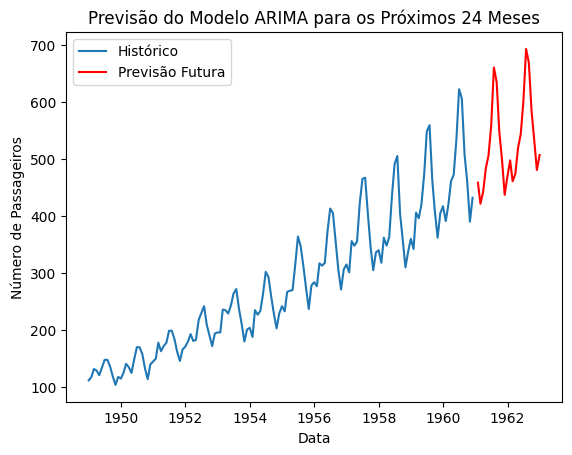

In [89]:
# Ajustar o modelo aos dados completos
model = ARIMA(df['Passengers'], order=(12, 2, 12))
model_fit = model.fit()

# Fazer previsões futuras (12 meses à frente)
future_forecast = model_fit.forecast(steps=24)

# Criar um DataFrame para as previsões futuras
future_dates = pd.date_range(start='1961-01', periods=24, freq='M')
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})

# Plotar os resultados
plt.plot(df['Passengers'], label='Histórico')
plt.plot(future_dates, future_forecast, color='red', label='Previsão Futura')
plt.title('Previsão do Modelo ARIMA para os Próximos 24 Meses')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.legend()
plt.show()
